In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

In [2]:
data = pd.read_csv(
    "houseprice.csv"
)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"], 
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [4]:
X_train.groupby(X_train["Street"])["Street"].count()

Street
Grvl       5
Pave    1017
Name: Street, dtype: int64

In [5]:
X_train["Street"].value_counts()

Street
Pave    1017
Grvl       5
Name: count, dtype: int64

In [6]:
for col in X_train.columns:
    
    if X_train[col].dtypes == "O":
        
        if X_train[col].nunique()<3:
            print(X_train.groupby(col)[col].count()/len(X_train))
            print()

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



In [7]:
cat_cols = list(X_train.select_dtypes(exclude ="number"))
num_cols = list(X_train.select_dtypes(include ="number"))
num_but_cat = [col for col in num_cols if X_train[col].nunique()<10]
cat_but_car = [col for col in cat_cols if X_train[col].nunique()>10]

cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car ]
num_cols = [col for col in num_cols if col not in num_but_cat]

In [8]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [9]:
for col in ["MasVnrType","ExterQual","BsmtCond"]:
    print(X_train.groupby(col)[col].count()/len(X_train))
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



In [10]:
for col in ["MasVnrType","ExterQual","BsmtCond"]:
    print(X_train[col].value_counts()/len(X_train))
    print()

MasVnrType
BrkFace    0.294521
Stone      0.094912
BrkCmn     0.009785
Name: count, dtype: float64

ExterQual
TA    0.626223
Gd    0.332681
Ex    0.029354
Fa    0.011742
Name: count, dtype: float64

BsmtCond
TA    0.897260
Gd    0.045010
Fa    0.032290
Po    0.001957
Name: count, dtype: float64



In [11]:
for col in cat_but_car:
    print(X_train.groupby(col)[col].count()/len(X_train))
    print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

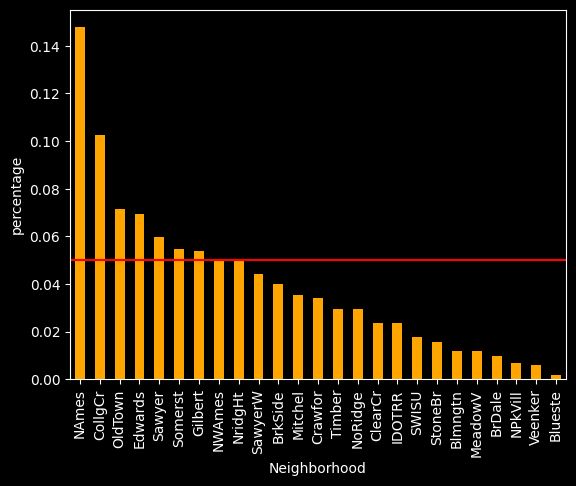

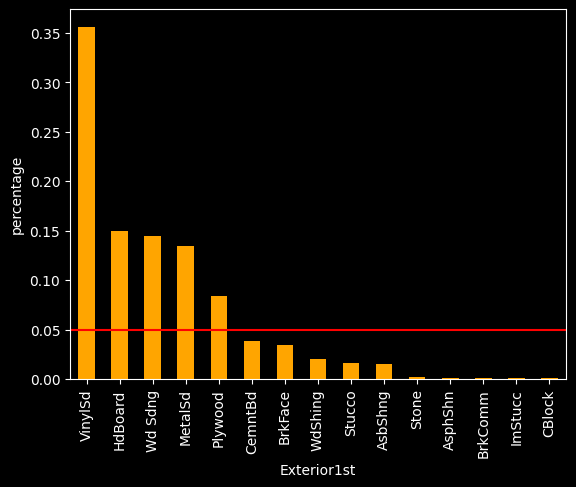

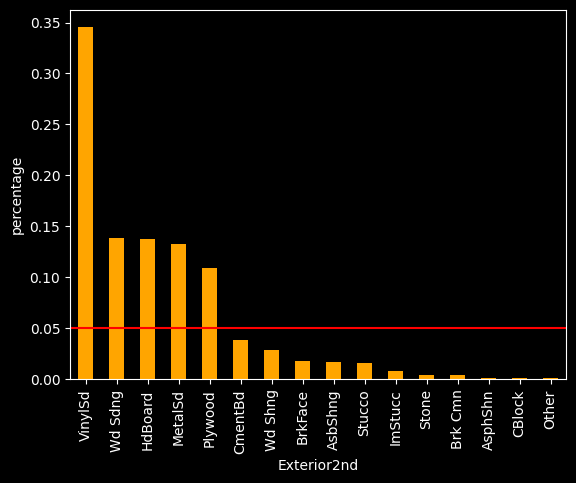

In [12]:
for col in cat_but_car:
    temp_df = pd.Series(X_train[col].value_counts()/len(X_train))
    fig = temp_df.sort_values(ascending=False).plot.bar(color="orange")
    fig.set_xlabel(col)
    fig.axhline(y=0.05,color="red")
    fig.set_ylabel("percentage")
    plt.show()

In [13]:
cat_percent=X_train["Exterior1st"].value_counts() / len(X_train)
cat_percent

Exterior1st
VinylSd    0.356164
HdBoard    0.149706
Wd Sdng    0.144814
MetalSd    0.135029
Plywood    0.084149
CemntBd    0.038160
BrkFace    0.034247
WdShing    0.020548
Stucco     0.016634
AsbShng    0.014677
Stone      0.001957
AsphShn    0.000978
BrkComm    0.000978
ImStucc    0.000978
CBlock     0.000978
Name: count, dtype: float64

In [14]:
list(cat_percent[cat_percent<0.05].index)

['CemntBd',
 'BrkFace',
 'WdShing',
 'Stucco',
 'AsbShng',
 'Stone',
 'AsphShn',
 'BrkComm',
 'ImStucc',
 'CBlock']

In [15]:
all_cat = cat_cols + cat_but_car

for col in all_cat:
    category_percent = X_train[col].value_counts() / len(X_train)
    category = list(category_percent[category_percent<0.05].index)
    
    if len(category)>=1:
        X_train[col] = X_train[col].replace(category,"other")

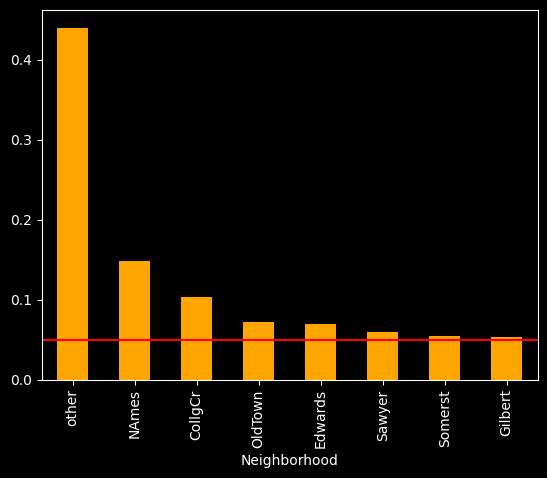

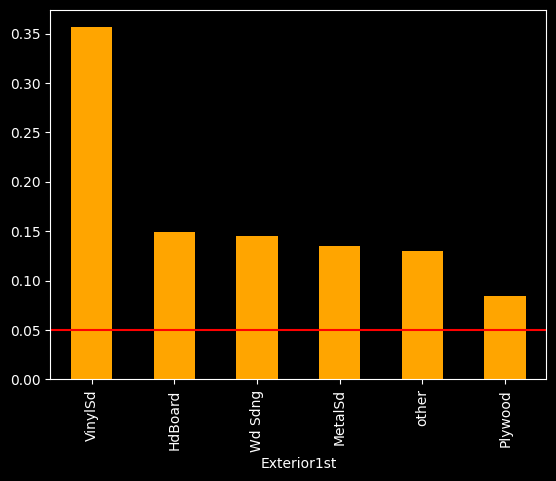

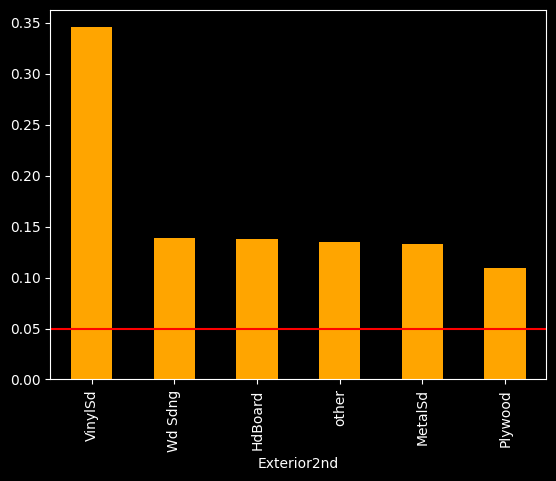

In [16]:
for col in cat_but_car:
    temp_df = X_train[col].value_counts() / len(X_train)
    fig = temp_df.sort_values(ascending=False).plot.bar(color ="orange")
    fig.axhline(y=0.05,color = "red")
    plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"], 
    test_size=0.3,  
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [18]:
from feature_engine.encoding import RareLabelEncoder
rare_enc = RareLabelEncoder(
    tol=0.05,
    n_categories=2,
    variables=cat_but_car
)
rare_enc.fit(X_train)

RareLabelEncoder(n_categories=2,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [19]:
X_train = rare_enc.transform(X_train)
X_test= rare_enc.transform(X_test)

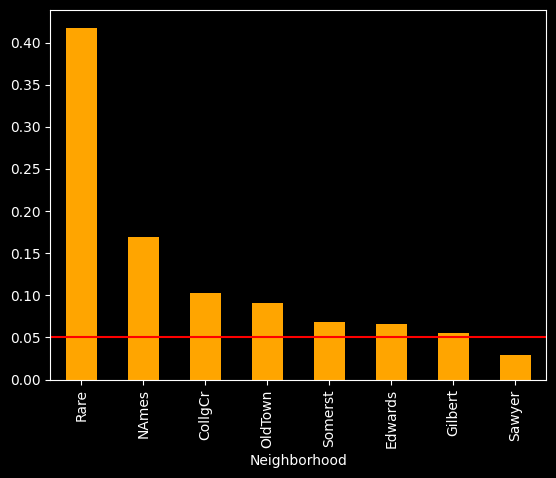

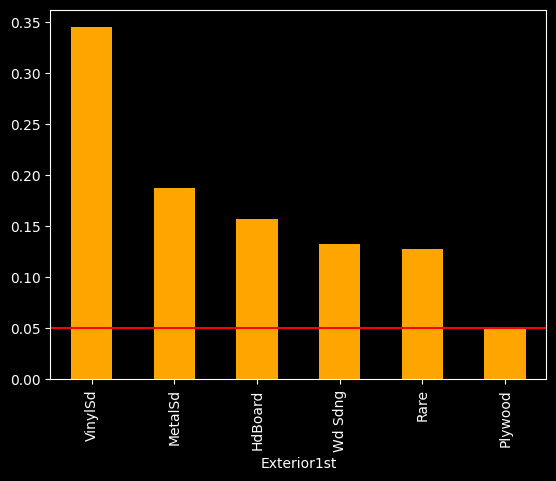

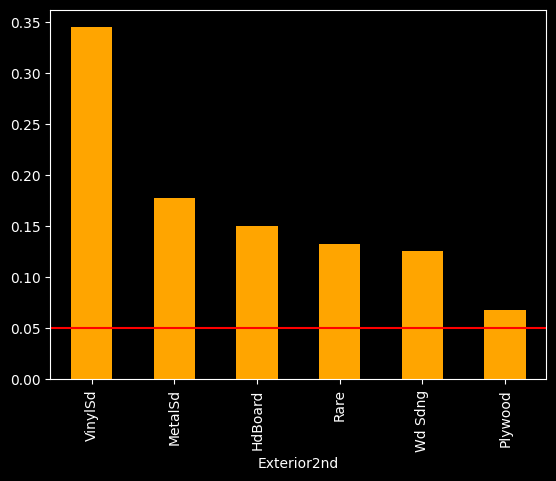

In [20]:
for col in cat_but_car:
    temp_df = X_test[col].value_counts() / len(X_test)
    fig = temp_df.sort_values(ascending=False).plot.bar(color ="orange")
    fig.axhline(y=0.05,color = "red")
    plt.show()